# Week 4 - Homework 3: Image Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2

## 1. Loading and Displaying Image (Numpy and OpenCV Basics)

+ Load Pandas.png using Numpy and display its dimensions and color channels

In [2]:
panda = Image.open("Panda.png")
panda_array = np.asarray(panda)

panda_array.shape

(1528, 1522, 4)

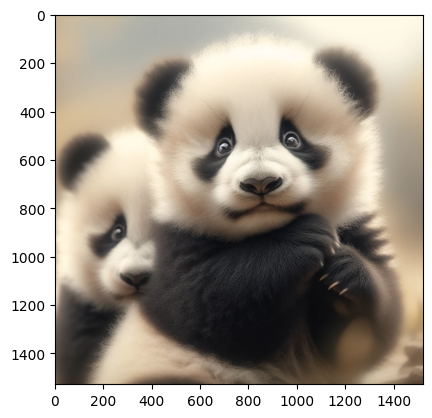

In [3]:
plt.imshow(panda_array)

+ Using OpenCV, read and display the 'Pandas.png' image. Demonstrate how to access and modify pixel values

In [4]:
img = cv2.imread("Panda.png")
img.shape

(1528, 1522, 3)

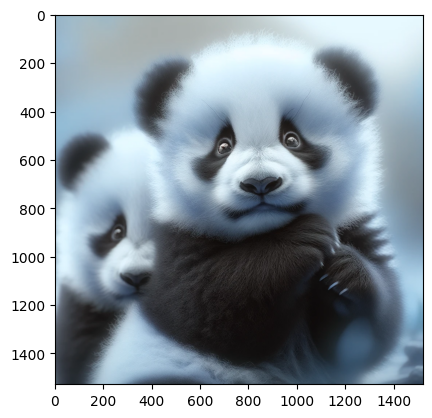

In [5]:
plt.imshow(img)

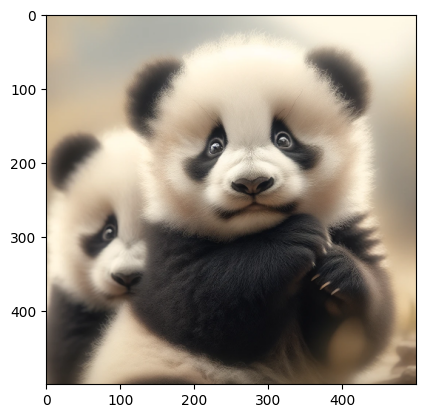

In [6]:
fixed_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_img = cv2.resize(fixed_img, (500,500))
plt.imshow(new_img)

## 2. Color Space Conversion

+ Convert the 'Pandas.png' image from BGR to RGB color space using OpenCV and display the result.

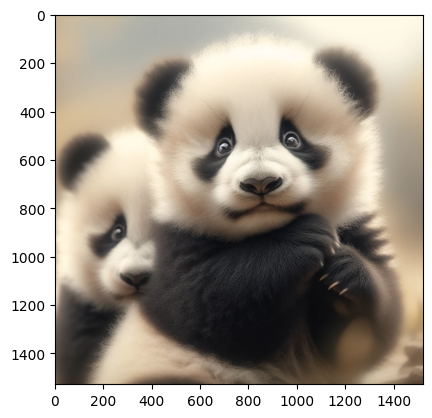

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

+ Convert the 'Pandas.png' image to grayscale and display the result

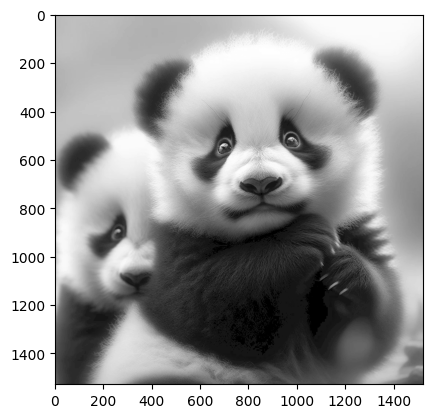

In [8]:
img_gray = cv2.imread("Panda.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap="gray")

## 3. Image Resizing

+ Resize the 'Pandas.png' image to a specific width and height using OpenCV. Display both the original and resized images.

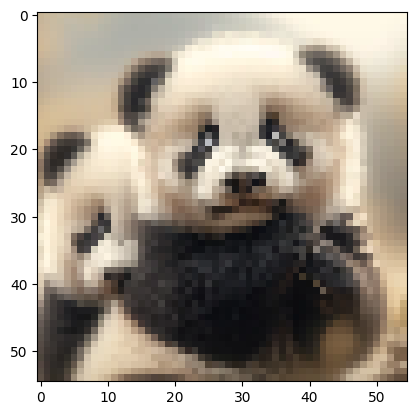

In [9]:
r_img = cv2.resize(fixed_img, (55,55))
plt.imshow(r_img)

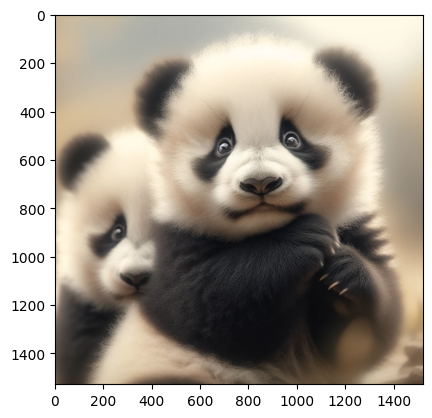

In [10]:
plt.imshow(img)

+ Write a script to resize the 'Pandas.png' image by a specific ratio (e.g., reduce by half) and display the resized image.

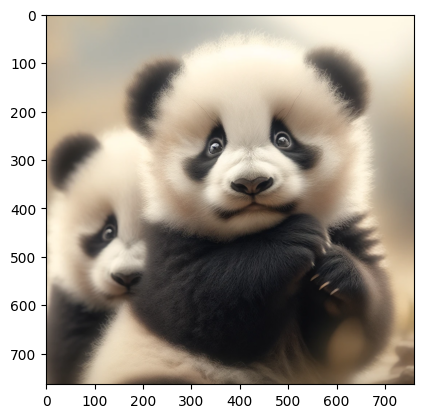

In [11]:
w_ratio = 0.5
l_ratio = 0.5

n_img = cv2.resize(img, (0,0), img, w_ratio, l_ratio)
plt.imshow(n_img)

## 4. Image Thresholding

+ Apply binary thresholding to the grayscale version of 'Pandas.png' and display the result.

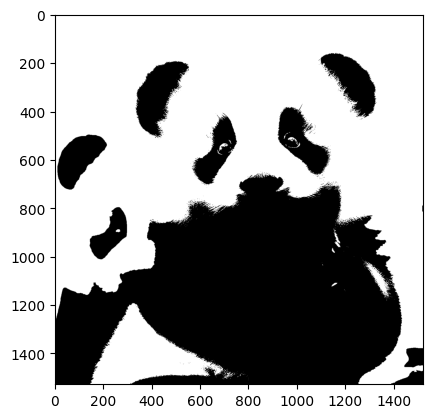

In [12]:
b_img = cv2.imread("Panda.png", 0)

ert, thresh1 = cv2.threshold(b_img, 130,255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")

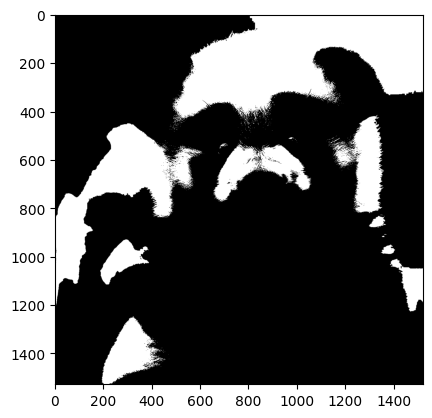

In [ ]:
ert, thresh1 = cv2.threshold(b_img, 200,255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")

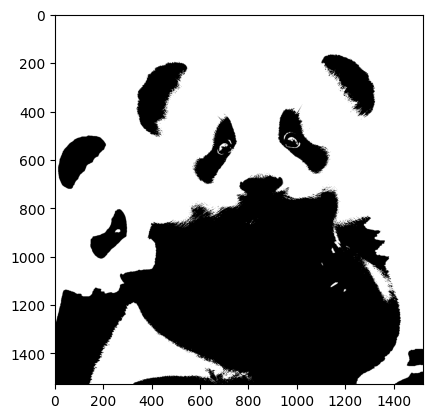

In [13]:
ert, thresh1 = cv2.threshold(b_img, 120,15, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")

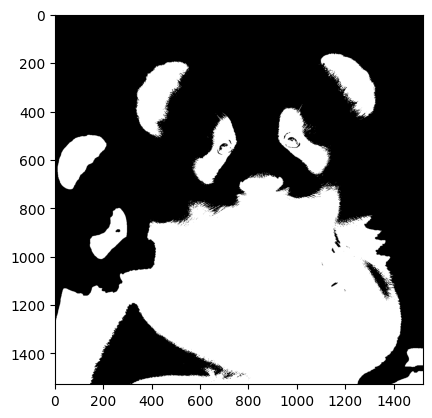

In [14]:
ert, thresh2 = cv2.threshold(b_img,127,255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, cmap="gray")

## 5. Brightness Adjustment

+ Write a script to increase the brightness of the image by a certain value and display the brightened image.

In [15]:
def load_img():
    img = cv2.imread("Panda.png").astype(np.float32)/255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img)

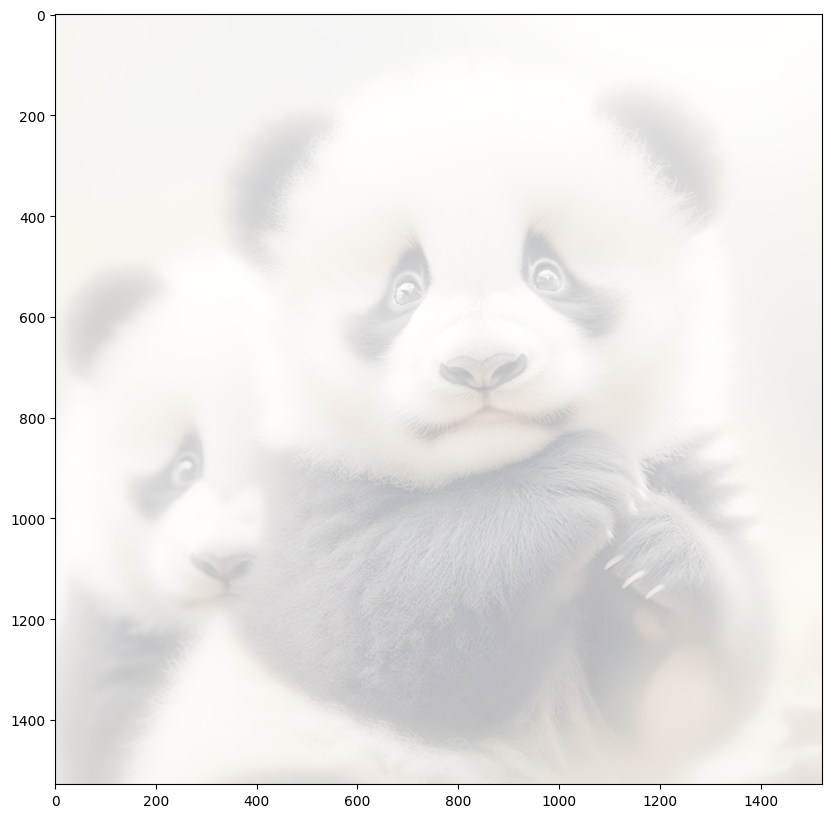

In [16]:
img = load_img()

gamma = 0.1

bright_image = np.power(img, gamma)
display_img(bright_image)

## 6. Blurring and Smoothing

+ Apply Gaussian Blur to 'Pandas.png' and display both the original and blurred images.

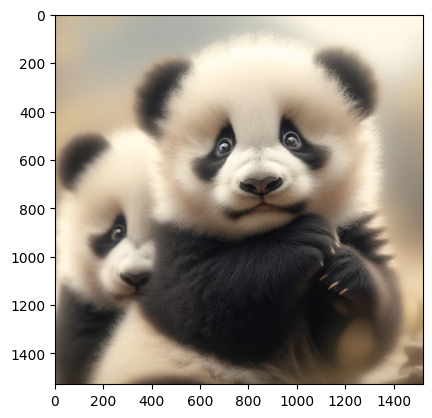

In [19]:
blur = cv2.GaussianBlur(img, (5,5), 0)

plt.imshow(img)

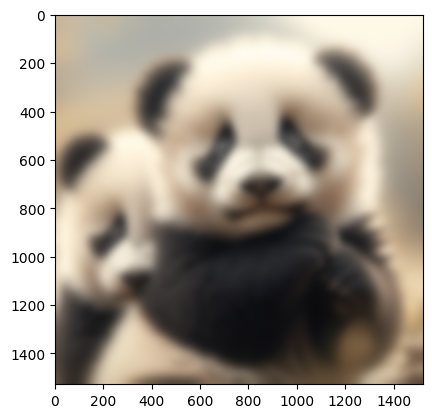

In [18]:
blur = cv2.GaussianBlur(img, (105,105), 0)
plt.imshow(blur)

Increasing the kernel size leads to a stronger blur.

## 7. Image Indexing and Cropping

+ Crop a portion of the 'Pandas.png' image using indexing and display the cropped image.

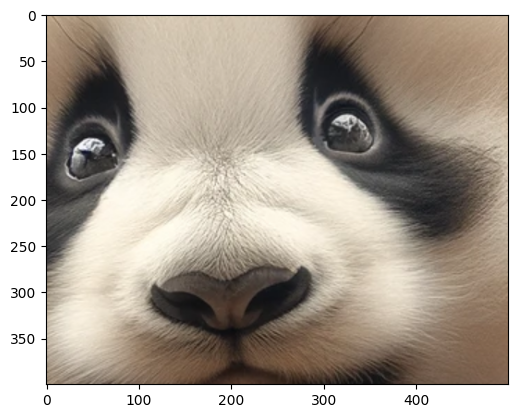

In [20]:
x_img = img.copy()
plt.imshow(x_img[400:800, 650:1150])

+ Change the color of a specific region of 'Pandas.png' using indexing and display the result.

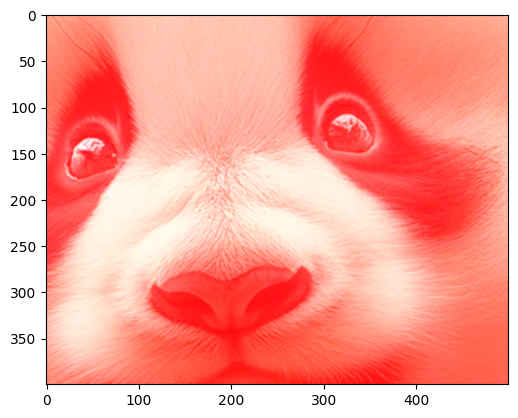

In [21]:
cropped_image = x_img[400:800, 650:1150]

cropped_image[:, :, 0] = 1

plt.imshow(cropped_image)
plt.show()

## 8. Image Rotation **

+ Rotate the 'Pandas.png' image by 45 degrees without cropping the corners and display the result

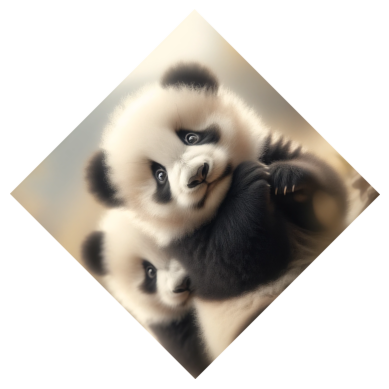

In [23]:
image = cv2.imread('Panda.png')


angle = 45


height, width = image.shape[:2]


rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)


new_width = int((width * abs(np.cos(np.radians(angle)))) + (height * abs(np.sin(np.radians(angle)))))
new_height = int((width * abs(np.sin(np.radians(angle)))) + (height * abs(np.cos(np.radians(angle)))))


rotation_matrix[0, 2] += (new_width - width) / 2
rotation_matrix[1, 2] += (new_height - height) / 2


rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))


plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

+ Discuss the challenges and solutions in rotating images like 'Pandas.png'.

It's hard to rotate without cutting corners.

## 9. Image Flipping

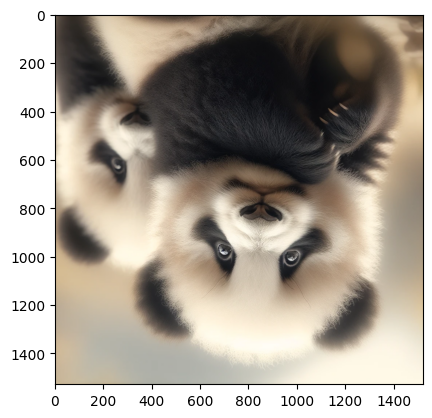

In [24]:
f_img = cv2.flip(fixed_img, 0)
plt.imshow(f_img)

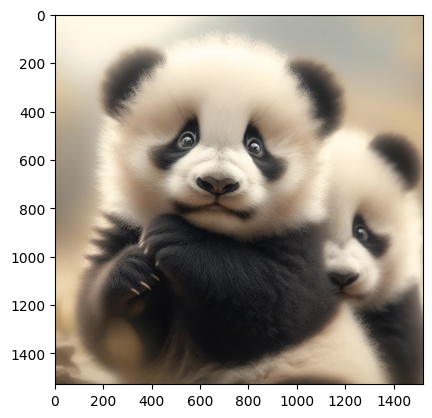

In [25]:
f_img = cv2.flip(fixed_img, 1)
plt.imshow(f_img)

+ Explain when flipping an image might be useful in preprocessing steps.

To expand the dataset and prevent overfitting

## 10. Edge Detection

+ Apply the Sobel filter to find edges in the 'Pandas.png' image and display the result. Explain how it computes the gradients.

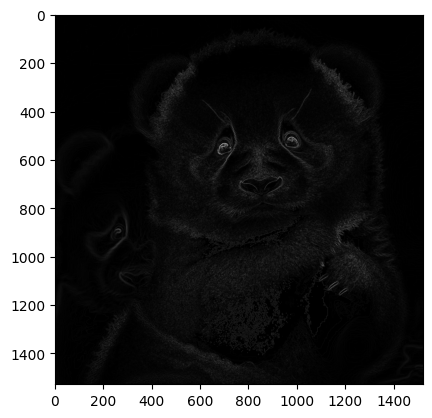

In [31]:
# Read the image
image = cv2.imread('Panda.png', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Unable to read the image.")
else:
    # Apply Sobel filter to find edges
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel filter for horizontal edges
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel filter for vertical edges

    # Compute the gradient magnitude
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalize the gradient magnitude to the range [0, 255]
    gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    plt.imshow(gradient_magnitude_normalized, cmap='gray')

## 11. Gradients in Image

+ Calculate and display the gradient direction and magnitude images

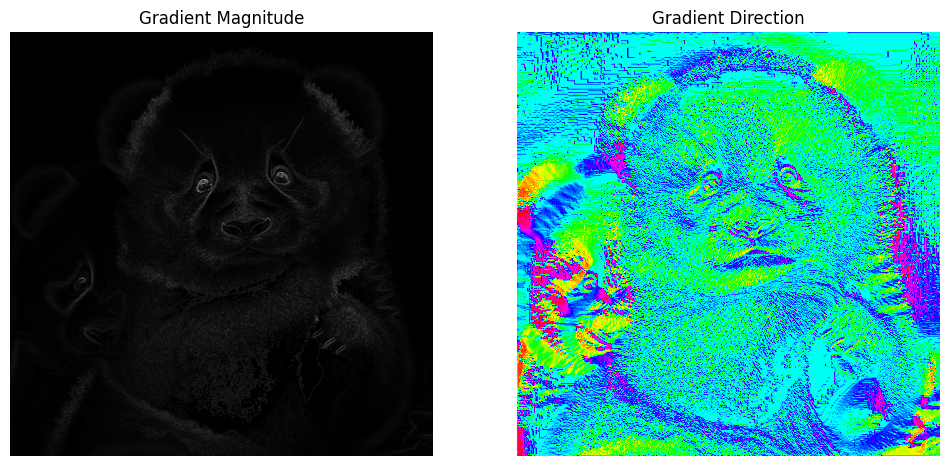

In [33]:
image = cv2.imread('Panda.png', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Unable to read the image.")
else:
    # Apply Sobel filter to find edges
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel filter for horizontal edges
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel filter for vertical edges

    # Compute the gradient magnitude and direction
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    gradient_direction = np.arctan2(sobel_y, sobel_x)

    # Display the gradient magnitude and direction
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title('Gradient Magnitude')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradient_direction, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    plt.title('Gradient Direction')
    plt.axis('off')

    plt.show()